In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train = 100
num_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5.0

D:\Programdata\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
D:\Programdata\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
x = nd.random.normal(shape=(num_train + num_test, 1))
X = nd.concat(x, nd.power(x, 2), nd.power(x, 3))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_w[2] * X[:, 2] + true_b
y += .1 * nd.random.normal(shape=y.shape)

('x:', x[:5], 'X:', X[:5], 'y:', y[:5])

('x:', 
 [[ 1.1630785 ]
  [ 0.4838046 ]
  [ 0.29956347]
  [ 0.15302546]
  [-1.1688148 ]]
 <NDArray 5x1 @cpu(0)>, 'X:', 
 [[ 1.1630785   1.3527517   1.5733565 ]
  [ 0.4838046   0.2340669   0.11324265]
  [ 0.29956347  0.08973827  0.02688231]
  [ 0.15302546  0.02341679  0.00358337]
  [-1.1688148   1.366128   -1.5967506 ]]
 <NDArray 5x3 @cpu(0)>, 'y:', 
 [ 10.534649    5.530093    5.1570797   5.0066853 -10.068435 ]
 <NDArray 5 @cpu(0)>)

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(X_train, X_test, y_train, y_test):
    # 线性回归模型
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    # 设一些默认参数
    learning_rate = 0.01
    epochs = 100
    batch_size = min(10, y_train.shape[0])
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size, shuffle=True)
    # 默认SGD和均方误差
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate})
    square_loss = gluon.loss.L2Loss()
    # 保存训练和测试损失
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(square_loss(
            net(X_train), y_train).mean().asscalar())
        test_loss.append(square_loss(
            net(X_test), y_test).mean().asscalar())
    # 打印结果    
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()
    return ('learned weight', net[0].weight.data(), 
            'learned bias', net[0].bias.data())

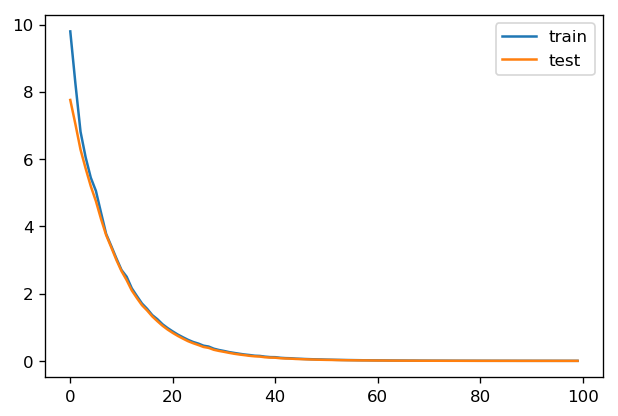

('learned weight', 
 [[ 1.1701626 -3.3906295  5.6027536]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [4.9855433]
 <NDArray 1 @cpu(0)>)

In [4]:
train(X[:num_train, :], X[num_train:, :], y[:num_train], y[num_train:])

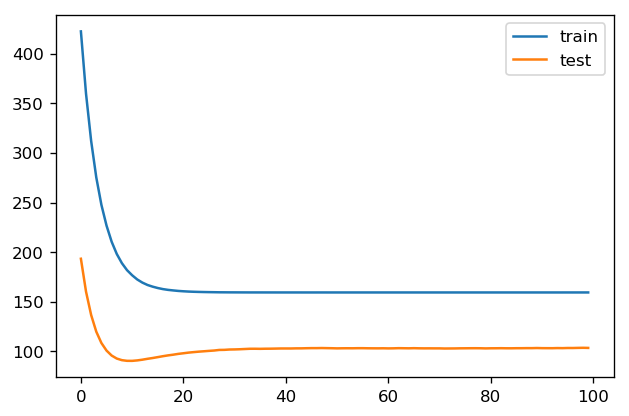

('learned weight', 
 [[22.729343]]
 <NDArray 1x1 @cpu(0)>, 'learned bias', 
 [-0.68284464]
 <NDArray 1 @cpu(0)>)

In [5]:
train(x[:num_train, :], x[num_train:, :], y[:num_train], y[num_train:])

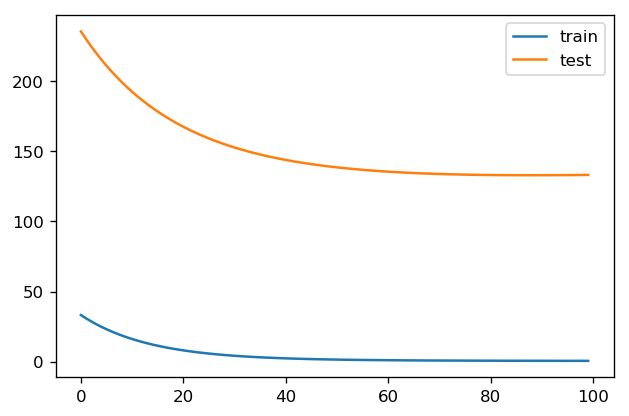

('learned weight', 
 [[2.058846  1.927367  2.0477402]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [2.4821289]
 <NDArray 1 @cpu(0)>)

In [6]:
train(X[0:2, :], X[num_train:, :], y[0:2], y[num_train:])